## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651673 entries, 0 to 651672
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        651673 non-null  float64
 1   lng        651673 non-null  float64
 2   desc       651673 non-null  object 
 3   zip        572815 non-null  float64
 4   title      651673 non-null  object 
 5   timeStamp  651673 non-null  object 
 6   twp        651390 non-null  object 
 7   addr       651673 non-null  object 
 8   e          651673 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.7+ MB


In [5]:
df.head(3)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1

  the top 5 zipcodes for 911 calls

In [6]:
df['zip'].value_counts().head(5)

19401.0    44715
19464.0    43061
19403.0    34248
19446.0    31672
19406.0    22039
Name: zip, dtype: int64

 the top 5 townships (twp) for 911 calls

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    54608
ABINGTON        39253
NORRISTOWN      36875
UPPER MERION    35364
CHELTENHAM      30006
Name: twp, dtype: int64

number of unique title codes present in 'title'

In [8]:
df['title'].nunique()

148

## Creating new features

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

 the most common Reason for a 911 call based off of this new column? **

In [10]:
df['Reason'].value_counts()

EMS        326246
Traffic    226793
Fire        98634
Name: Reason, dtype: int64

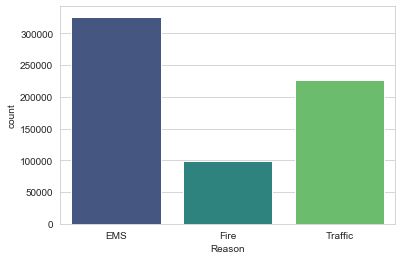

In [11]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of Week'] = df['Day of Week'].map(dmap)

using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

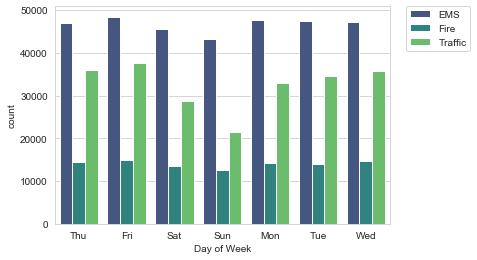

In [17]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Now do the same for Month:**

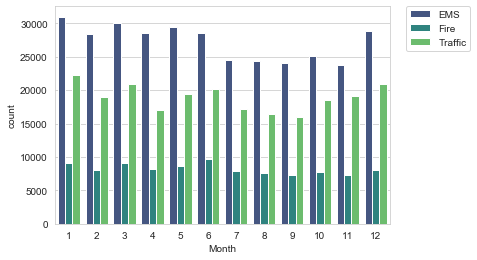

In [18]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [19]:
# It is missing some months! 9,10, and 11 are not there.

In [20]:
byMonth = df.groupby('Month').count()
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      62336  62336  62336  55294  62336      62336  62312  62336  62336   
2      55427  55427  55427  48922  55427      55427  55405  55427  55427   
3      60027  60027  60027  53252  60027      60027  60001  60027  60027   
4      53671  53671  53671  47349  53671      53671  53655  53671  53671   
5      57509  57509  57509  50354  57509      57509  57474  57509  57509   

       Reason   Hour  Day of Week  
Month                              
1       62336  62336        62336  
2       55427  55427        55427  
3       60027  60027        60027  
4       53671  53671        53671  
5       57509  57509        57509

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

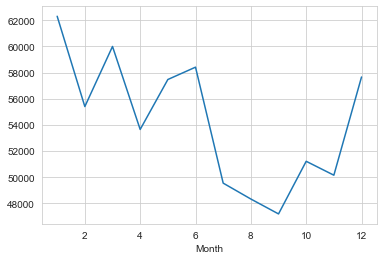

In [21]:
# Could be any column
byMonth['twp'].plot()

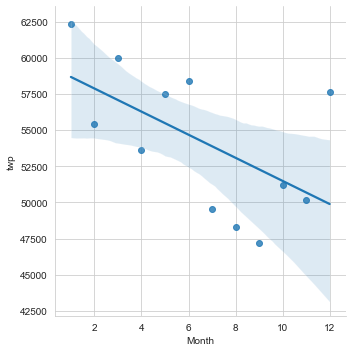

In [22]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [23]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

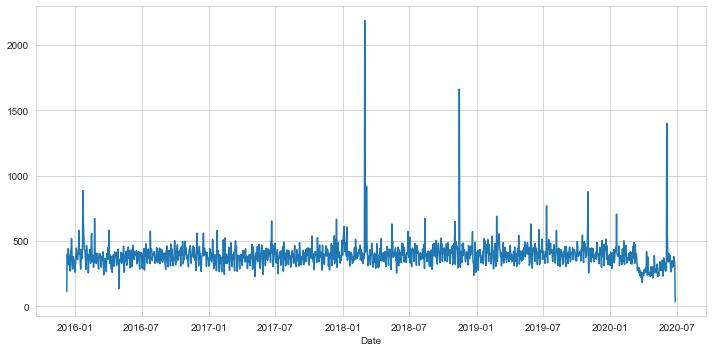

In [25]:
plt.figure(figsize=(10,5))
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

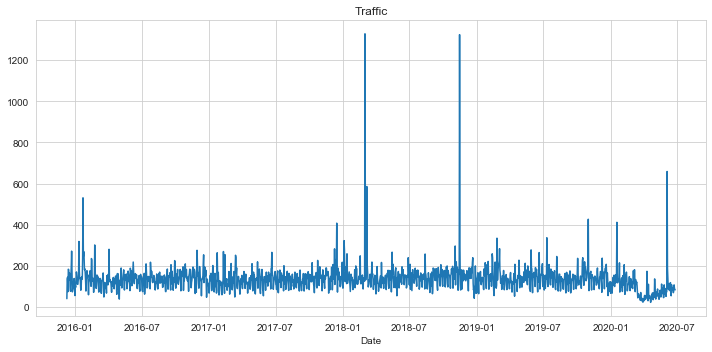

In [26]:
plt.figure(figsize=(10,5))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

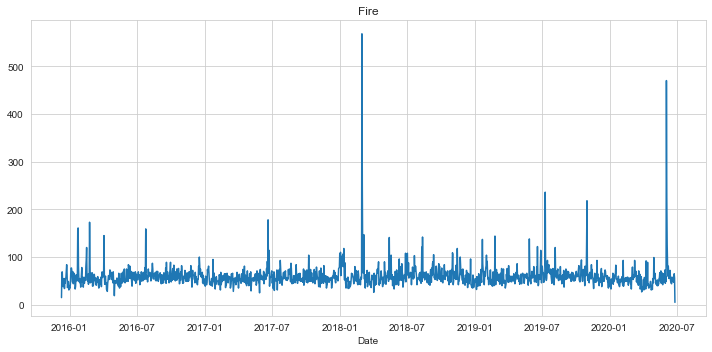

In [28]:
plt.figure(figsize=(10,5))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

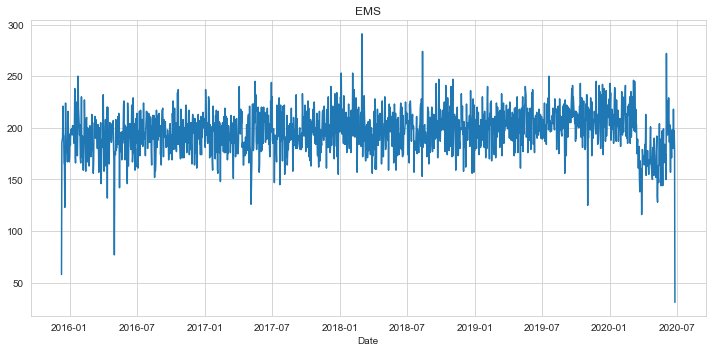

In [29]:
plt.figure(figsize=(10,5))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [30]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour           0     1     2     3     4     5     6     7     8     9   ...  \
Day of Week                                                              ...   
Fri          1949  1615  1429  1281  1309  1609  2631  4092  4959  5194  ...   
Mon          1857  1534  1334  1253  1318  1809  2638  4373  5434  5635  ...   
Sat          2387  2015  1858  1554  1419  1541  1849  2444  3396  4254  ...   
Sun          2380  2101  1908  1582  1444  1462  1702  2362  2951  3646  ...   
Thu          1713  1391  1404  1215  1269  1746  2783  4394  5245  5334  ...   

Hour           14    15    16    17    18    19    20    21    22    23  
Day of Week                                                              
Fri          6239  6905  6951  6977  5555  4963  4294  3829  3351  2792  
Mon          5558  6104  6242  6302  5331  4403  3703  3173  2617  2035  
Sat          5327  5078  5112  5098  4882  4660  4062  3817  3145  2905  
Sun          4652  4372  4480  4407  4294  4059  3669  3089  2565  2283  
Thu          5975  6381  6289  6842  5423  4623  3981  3437  2804  2330  

[5 rows x 24 columns]

** Now create a HeatMap using this new DataFrame. **

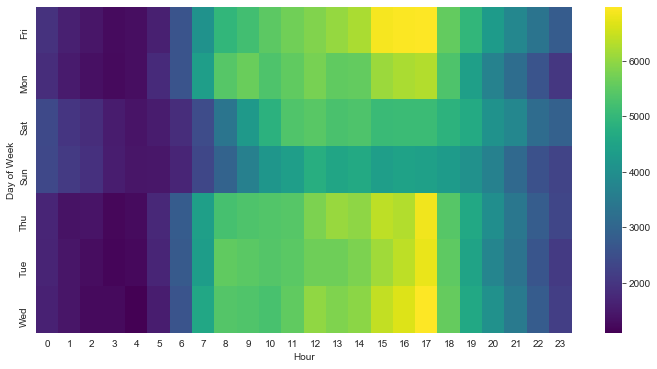

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

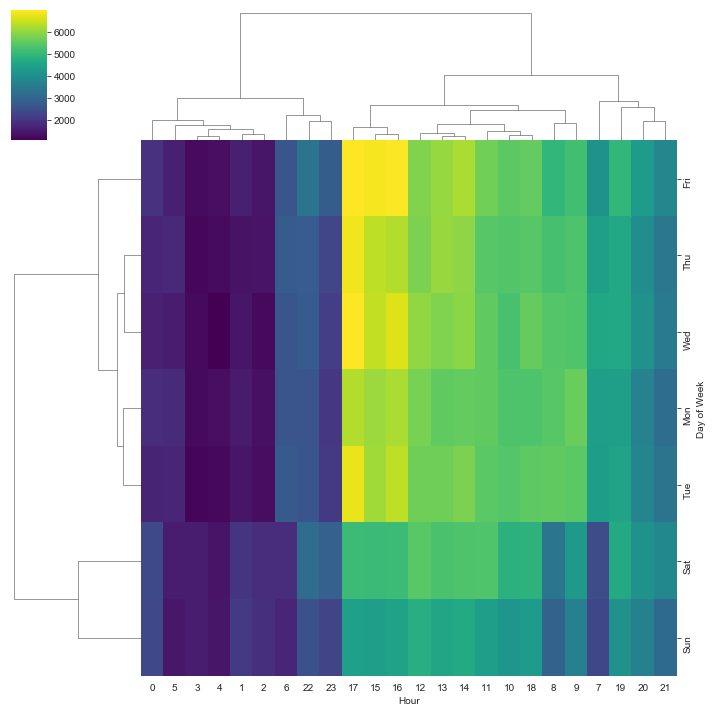

In [32]:
sns.clustermap(dayHour,cmap='viridis')

repeating the same plots and operations, for a DataFrame that shows the Month as the column.

In [33]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month          1     2      3     4     5     6     7     8     9     10  \
Day of Week                                                                
Fri          9309  8255  10941  7997  8904  8894  7103  7336  7694  6934   
Mon          8896  8747   8060  8410  7881  8177  7929  6854  6598  8075   
Sat          8475  7593   8050  7514  7223  7850  6395  6111  6566  6609   
Sun          7478  6452   6766  6865  6694  6584  6567  5275  5956  6316   
Thu          9055  7997   8849  7722  8740  9489  6964  7508  6954  7482   

Month          11    12  
Day of Week              
Fri          8379  9305  
Mon          6722  8492  
Sat          6773  8592  
Sun          5196  7165  
Thu          8358  8151

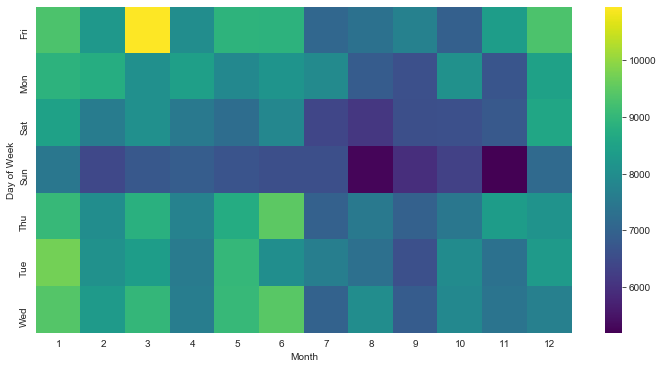

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

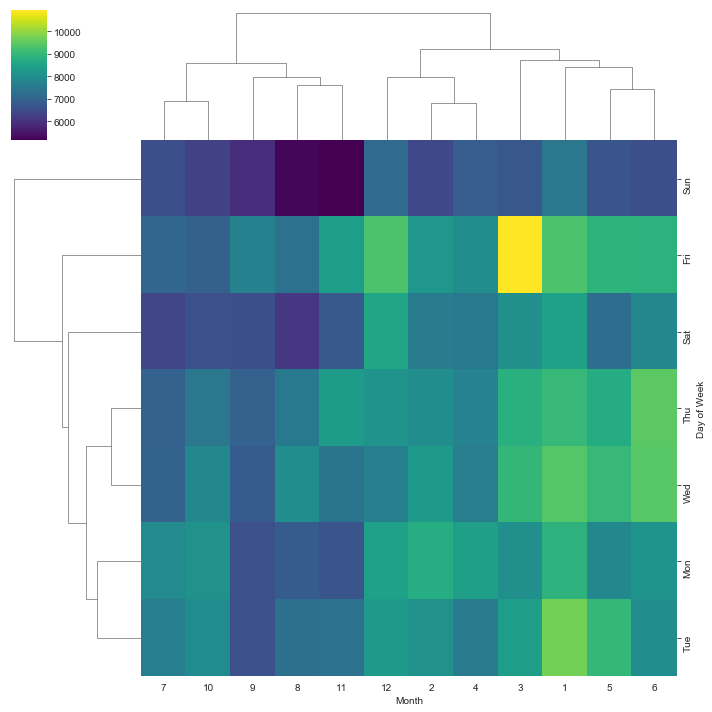

In [35]:
sns.clustermap(dayMonth,cmap='viridis')